<a href="https://colab.research.google.com/github/LukasBeckers/Transformer_Image_Completion/blob/main/Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ImageNet-R**

The imagenet_r dataset is a subset of the ImageNet dataset. It is comprised of 30000 vastly different images. As with the ImageNet, each image in the ImageNet-R dataset is assigned to one of 1000 labels. The ImageNet-R was created by collecting Images, that the ResNet-50 model misslabeled. 

In this notebook i will download the imagenet_r dataset from tensorflow. Then i will separately save each image with it's metadata, including the format of the image. 

## Why is this step needed?

When the dataset is used as it is after the download from tensorflow, each image in a batch will be padded with black pixles to match the hight/width-pixel number of the largest image in the batch. Without knowing the original shape of the image, it is difficult to create a mask for each image, which can be used in the transformer-model.



In [1]:
# Imports

from google.colab.patches import cv2_imshow
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle as pk
import numpy as np
import shutil
import random
import time
import cv2
import os

In [2]:
# Checking the current directory.

!pwd

/content


In [3]:
# Connecting the notebook to your google-drive.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Changing to the directory in which the dataset should be saved.

%cd /content/drive/MyDrive/Colab Notebooks/Transformer_Image_Completion

/content/drive/MyDrive/Colab Notebooks/Transformer_Image_Completion


In [ ]:
# Loading the Imagenet_r dataset.

# Don't run this cell on your own device, or the dataset will be downloaded to 
# your own drive.

imagenet_r = tfds.load('imagenet_r', split='test')

print(f'Number of images in the imagenet_r dataset: {len(imagenet_r)}')

Number of images in the imagenet_r dataset: 30000


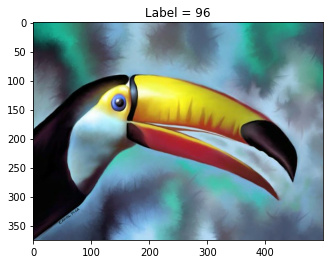

In [ ]:
# Loading a test-image to show all transformations done to the samples.

for test_sample in imagenet_r:
  break

test_image = test_sample['image']
test_label = test_sample['label']

# Showing the test_image and the test_label.
plt.imshow(test_image)
plt.title(f'Label = {test_label}')
plt.show()

In [ ]:

# Creating new folders in which the dataset wil be saved.
!mkdir '/content/drive/MyDrive/Colab Notebooks/Transformer_Image_Completion/split_imagenet_r'
ds_dir = '/content/drive/MyDrive/Colab Notebooks/Transformer_Image_Completion/split_imagenet_r'

mkdir: cannot create directory ‘/content/drive/MyDrive/Colab Notebooks/Transformer_Image_Completion/split_imagenet_r’: File exists


In [ ]:
# Now all samples from the dataset are saved with the 
# conditional information (shape and label) in the file name.

len_of_ds = len(imagenet_r)

for i, sample in enumerate(imagenet_r):
  full_image = sample['image']
  label = sample['label']

  # Creating a file-name for the full_image.
  # The file-name will contain the image_shape and the label
  # in an easyly extractable form. 
  # File-name template = i_image-shape[0]_image-shape[1]_label
  name = f'{i}_{full_image.shape[0]}_{full_image.shape[1]}_{label}'

  # Saving the image.
  cv2.imwrite(f'{ds_dir}/{name}.jpeg', np.array(full_image))


In [6]:
"""
To load each sample from the drive for each training-step turns out to be to slow,
for this reason the dataset is ziped and the zip-file is loaded to the colab each 
time the notebook-runtime is started.
"""

shutil.make_archive("zip_imagenet_r", 'zip', "imagenet_r")

'/content/drive/MyDrive/Colab Notebooks/Transformer_Image_Completion/zip_imagenet_e.zip'